# Example Fitting with ADCG

This example uses images from the 561 channel in position 4 of replicate 2, to be consistent with the companion packages. A version of this notebook is available on [google colab](https://colab.research.google.com/github/CaiGroup/SeqFISH_ADCG.jl/blob/master/example_notebooks/colab/example_FitDots.jl.ipynb).

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `D:\SeqFISH+Processing_project\SeqFISH_ADCG\example_notebooks`


In [2]:
using Plots
using SeqFISH_ADCG
using FileIO
using Images
using CSV

Load example data

In [3]:
ro_img = load("../example_data/ro_preprocessed.png")
ro_img = reinterpret.(UInt16, channelview(ro_img));

Set Parameters

In [4]:
sigma_lb = 0.87
sigma_ub = 1.22
tau = 2.0*10^12
final_loss_improvement = 1000.0
min_weight = 800.0
max_iters = 200
max_cd_iters = 20
threshold = 0.0;

For expediancy of the demonstration, we will choose a small example tile to run ADCG on

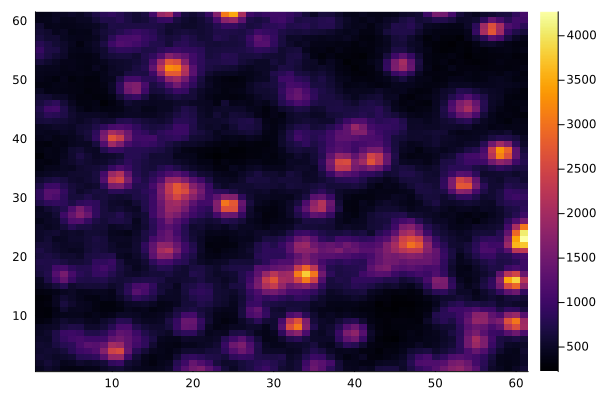

In [5]:
example_tile = ro_img[1020:1080, 1220:1280]
heatmap(example_tile)

Now we run ADCG on the tile sample tile

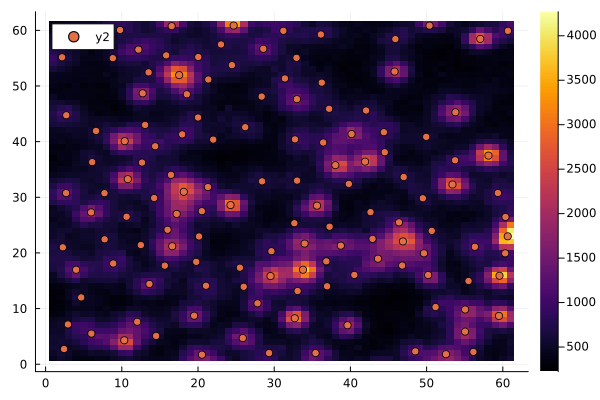

In [6]:
inputs = (example_tile, sigma_lb, sigma_ub, threshold, tau, final_loss_improvement, min_weight, max_iters, max_cd_iters, "ADCG")
ps = fit_tile(inputs)
heatmap(example_tile)
scatter!(ps.last_iteration.x, ps.last_iteration.y)

ADCG appears to pick up all of the dots. It may have a few extra, but it better to tune the parameters such that too many dots are picked up than too few because [SeqFISHSyndromeDecoding](https://github.com/CaiGroup/SeqFISHSyndromeDecoding) is very effective at discarding bad dots.

Running ADCG on a whole image requires breaking up the image into overlapping tiles, running ADCG on each tile, and piecing the tiles back together. All of the Cai Lab's microscopes use 2048X2048 cameras, so SeqFISH_ADCG comes with a special function, ```fit_2048x2048_img_tiles```, that breaks 2048 images up into tiles. (Warning: this function will take a few hours)

In [14]:
points_with_duplicates, records = fit_2048x2048_img_tiles(ro_img, sigma_lb, sigma_ub, tau, final_loss_improvement, min_weight, max_iters, max_cd_iters, threshold, fit_alg="ADCG");

Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!


In [15]:
println(first(points_with_duplicates, 5))

5×4 DataFrame
 Row │ x        y         s        w        
     │ Float64  Float64   Float64  Float64  
─────┼──────────────────────────────────────
   1 │ 36.7463  21.5771      1.22  1123.93
   2 │ 48.8036   7.45135     1.22  1124.78
   3 │  2.3487  33.7485      1.22   969.781
   4 │ 23.1862  68.0156      1.22   957.648
   5 │ 55.7508  48.5569      1.22   966.081


If you have images that are not of 2048x2048 pixels, you will need to use ```fit_img_tiles```, which ```fit_2048x2048_img_tiles``` wraps, and specify your own tile and overlap size. For example ```fit_2048x2048_img_tiles``` calls (again taking hours):

In [16]:
tile_width = 64
tile_overlap = 6

points_with_duplicates2, records = fit_img_tiles(ro_img, tile_width, tile_overlap, sigma_lb, sigma_ub, tau, final_loss_improvement, min_weight, max_iters, max_cd_iters, threshold, fit_alg="ADCG")

Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!
Hit max iters in frank-wolfe!


(68361×4 DataFrame
   Row │ x           y           s        w        
       │ Float64     Float64     Float64  Float64  
───────┼───────────────────────────────────────────
     1 │   36.7463     21.5771      1.22  1123.93
     2 │   48.8036      7.45135     1.22  1124.78
     3 │    2.3487     33.7485      1.22   969.781
     4 │   23.1862     68.0156      1.22   957.648
     5 │   55.7508     48.5569      1.22   966.081
     6 │   68.2528     68.3869      1.22   864.111
     7 │   61.7856     56.0963      1.22   893.048
     8 │   53.8156     40.4079      1.22   899.539
     9 │    8.10896     8.93904     1.22   839.168
    10 │   25.439      30.3342      1.22   828.223
    11 │    8.89131    59.8444      1.22   846.35
   ⋮   │     ⋮           ⋮          ⋮        ⋮
 68352 │ 1937.35     2033.55        1.22   895.744
 68353 │ 1966.03     2021.32        1.22   853.877
 68354 │ 1943.33     1986.62        1.22   861.912
 68355 │ 1988.5      2033.32        1.22   838.177
 68356 │ 1939.9 

In [17]:
println(first(points_with_duplicates2, 5))

5×4 DataFrame
 Row │ x        y         s        w        
     │ Float64  Float64   Float64  Float64  
─────┼──────────────────────────────────────
   1 │ 36.7463  21.5771      1.22  1123.93
   2 │ 48.8036   7.45135     1.22  1124.78
   3 │  2.3487  33.7485      1.22   969.781
   4 │ 23.1862  68.0156      1.22   957.648
   5 │ 55.7508  48.5569      1.22   966.081


You will need to ensure that the width and height of your image is divisible by ```tile_width```.

The next step is that you will need to remove dots that are too close to each other. This removes duplicates that are in the overlapping regions of the tiles, or may have just been fit twice by ADCG

In [24]:
min_allowed_separation=2.0
points = remove_duplicates(points_with_duplicates, ro_img, sigma_lb, sigma_ub, tau, threshold, min_allowed_separation)
first(points, 5)

Row,x,y,s,w
,Float64,Float64,Float64,Float64
1,36.7463,21.5771,1.22,1123.93
2,48.8036,7.45135,1.22,1124.78
3,2.3487,33.7485,1.22,969.781
4,55.7508,48.5569,1.22,966.081
5,61.7856,56.0963,1.22,893.048


In [26]:
println(first(points, 5))

5×4 DataFrame
 Row │ x        y         s        w        
     │ Float64  Float64   Float64  Float64  
─────┼──────────────────────────────────────
   1 │ 36.7463  21.5771      1.22  1123.93
   2 │ 48.8036   7.45135     1.22  1124.78
   3 │  2.3487  33.7485      1.22   969.781
   4 │ 55.7508  48.5569      1.22   966.081
   5 │ 61.7856  56.0963      1.22   893.048


In [25]:
CSV.write("example_fit.csv", points)

"example_fit.csv"